<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day13_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis
This notebook covers the concepts and models discussed in the presentation, with examples and visualizations to make the topics clearer.

## 1. Introduction to Time Series
**Definition**: A time series is a sequence of data points collected or recorded at specific time intervals.

**Examples**: Stock prices, weather data, sales data.

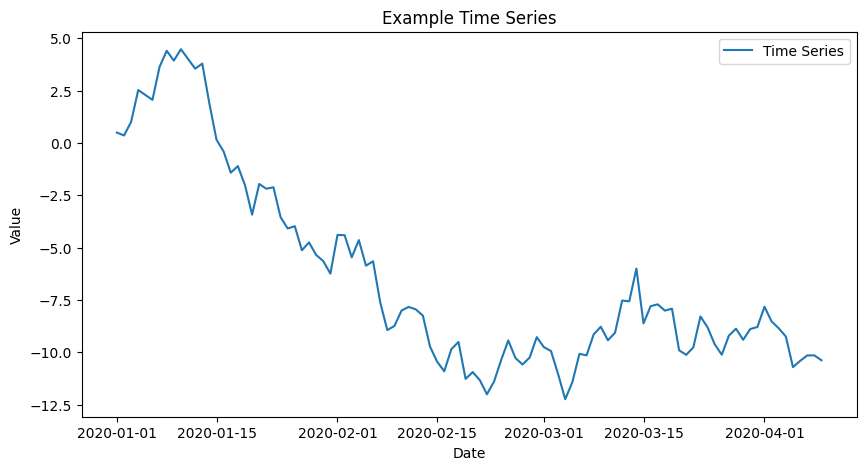

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(42)
time = pd.date_range('2020-01-01', periods=100, freq='D')
data = np.cumsum(np.random.randn(100))
df = pd.DataFrame({'Date': time, 'Value': data}).set_index('Date')

# Plot example time series
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Value'], label='Time Series')
plt.title('Example Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## 2. Time Series Decomposition
**Components**:
- **Trend**: Long-term progression in the data.
- **Seasonality**: Regular patterns repeating over time.
- **Residual**: Random variations.

### Example: Decomposing a Synthetic Time Series

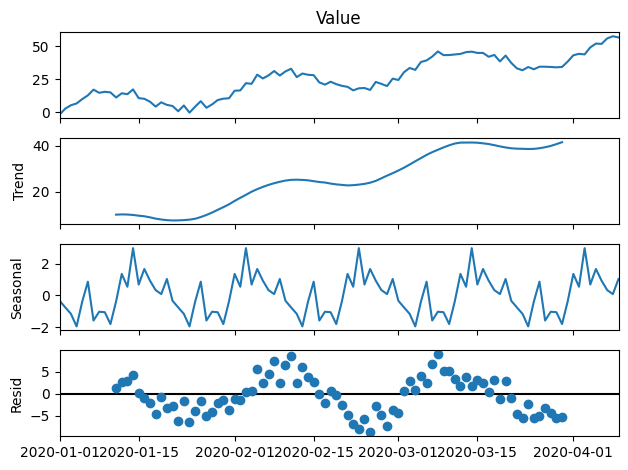

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate seasonal data
seasonal = 10 * np.sin(np.linspace(0, 20, 100))
trend = np.linspace(1, 50, 100)
noise = np.random.normal(0, 2, 100)
synthetic_data = seasonal + trend + noise
synthetic_df = pd.DataFrame({'Date': time, 'Value': synthetic_data}).set_index('Date')

# Decompose the series
decomposition = seasonal_decompose(synthetic_df['Value'], model='additive', period=20)

# Plot decomposition
decomposition.plot()
plt.show()

## 3. Trend Estimation
**Methods**:
- **Moving Average**: Smooths the data by averaging over a window.
- **Exponential Smoothing**: Applies decreasing weights to older observations.

### Example: Moving Average

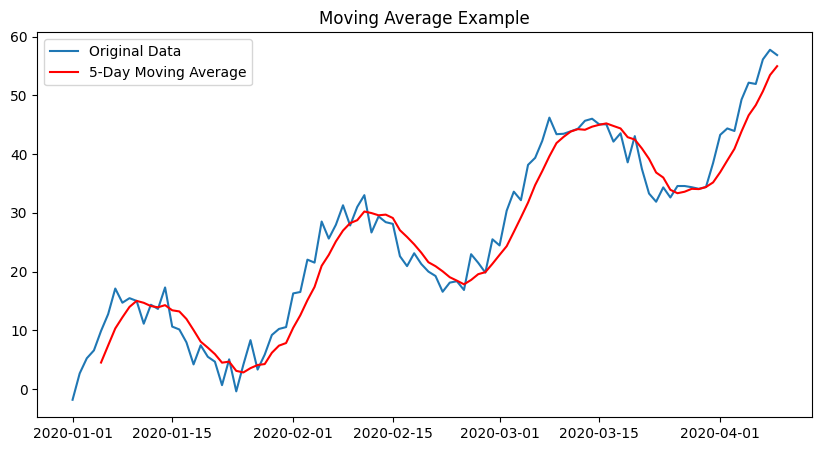

In [3]:
# Apply moving average
window = 5
synthetic_df['Moving Average'] = synthetic_df['Value'].rolling(window=window).mean()

# Plot moving average
plt.figure(figsize=(10, 5))
plt.plot(synthetic_df['Value'], label='Original Data')
plt.plot(synthetic_df['Moving Average'], label=f'{window}-Day Moving Average', color='red')
plt.title('Moving Average Example')
plt.legend()
plt.show()

## 4. Common Models for Time Series Prediction
### AR, ARMA, ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


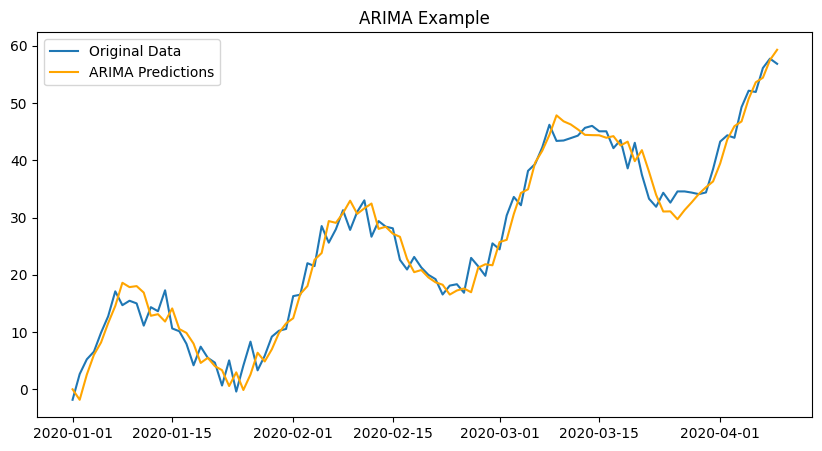

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(synthetic_df['Value'], order=(2, 1, 2))
arima_result = model.fit()

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(synthetic_df['Value'], label='Original Data')
plt.plot(arima_result.fittedvalues, label='ARIMA Predictions', color='orange')
plt.title('ARIMA Example')
plt.legend()
plt.show()

## 5. Advanced Models: LSTMs and Transformers
### Example: Using LSTMs

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3431
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2359 
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1539 
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0962 
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0379 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


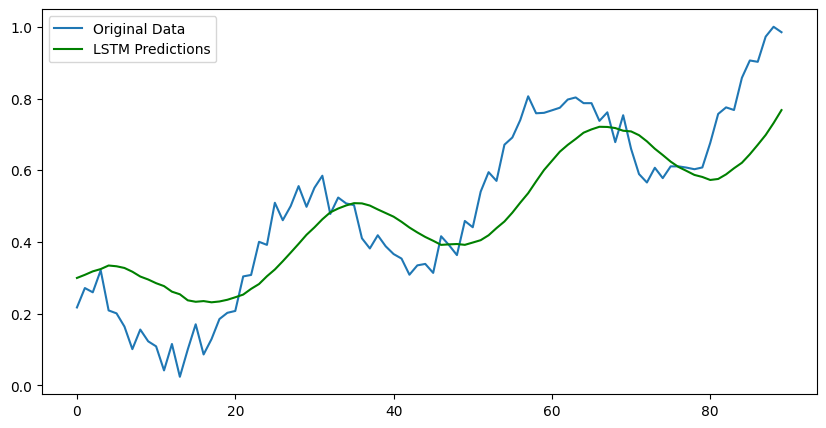

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(synthetic_df['Value'].values.reshape(-1, 1))
X = []
y = []
for i in range(10, len(scaled_data)):
    X.append(scaled_data[i-10:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
X = X.reshape((X.shape[0], X.shape[1], 1))
model.fit(X, y, epochs=5, batch_size=16, verbose=1)

# Predict and plot
predictions = model.predict(X)
plt.figure(figsize=(10, 5))
plt.plot(scaled_data[10:], label='Original Data')
plt.plot(predictions, label='LSTM Predictions', color='green')
plt.legend()
plt.show()

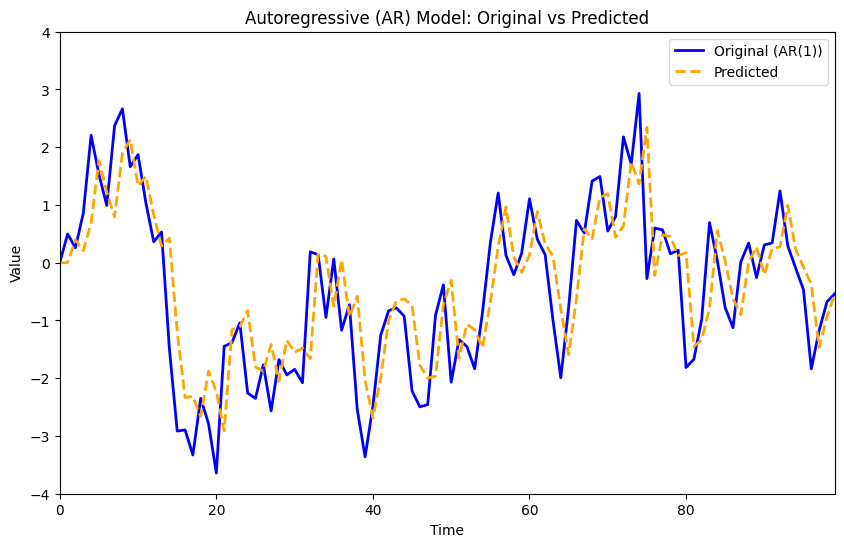

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the AR(1) process
np.random.seed(42)  # For reproducibility
phi = 0.8  # AR coefficient
sigma = 1  # Standard deviation of white noise
n = 100  # Number of points
y = np.zeros(n)
predicted_y = np.zeros(n)

# Generate AR(1) series
for t in range(1, n):
    y[t] = phi * y[t - 1] + np.random.normal(0, sigma)

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))
x_data, y_data, pred_data = [], [], []
line_original, = ax.plot([], [], color="blue", lw=2, label="Original (AR(1))")
line_predicted, = ax.plot([], [], color="orange", lw=2, linestyle="--", label="Predicted")

ax.set_xlim(0, n - 1)
ax.set_ylim(-4, 4)
ax.set_title("Autoregressive (AR) Model: Original vs Predicted")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.legend()

# Function to update the plot for each frame
def update(frame):
    x_data.append(frame)
    y_data.append(y[frame])
    if frame > 0:
        pred_data.append(phi * y[frame - 1])  # Predicted value based on the AR model
    else:
        pred_data.append(0)  # Initial predicted value is 0

    line_original.set_data(x_data, y_data)
    line_predicted.set_data(x_data, pred_data)
    return line_original, line_predicted

# Create the animation
ani = FuncAnimation(fig, update, frames=range(n), blit=True)

# Save the animation as a video
ani.save("ar_model_original_vs_predicted.mp4", writer="ffmpeg", fps=10)

# Show the animation in the notebook (optional)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


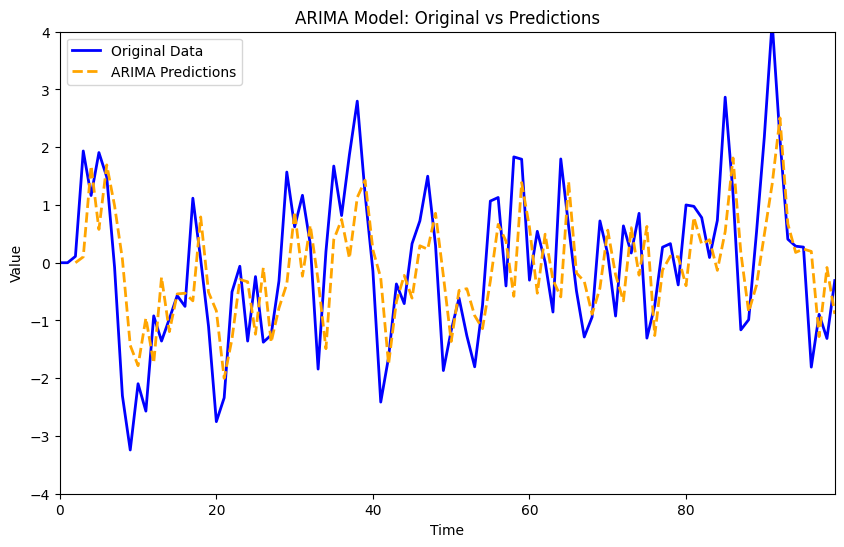

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic data
np.random.seed(42)
n = 100
phi = [0.8, -0.3]  # AR coefficients
theta = [0.5]  # MA coefficients
sigma = 1

# Generate ARMA(2, 1) process
y = np.zeros(n)
for t in range(2, n):
    y[t] = phi[0] * y[t - 1] + phi[1] * y[t - 2] + theta[0] * np.random.normal(0, sigma) + np.random.normal(0, sigma)

# Create a DataFrame
synthetic_df = pd.DataFrame({'Value': y})

# Fit ARIMA model
model = ARIMA(synthetic_df['Value'], order=(2, 1, 2))
arima_result = model.fit()

# Prepare for animation
fig, ax = plt.subplots(figsize=(10, 6))
x_data, y_data, pred_data = [], [], []
line_original, = ax.plot([], [], color="blue", lw=2, label="Original Data")
line_predicted, = ax.plot([], [], color="orange", lw=2, linestyle="--", label="ARIMA Predictions")

ax.set_xlim(0, n - 1)
ax.set_ylim(-4, 4)
ax.set_title("ARIMA Model: Original vs Predictions")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.legend()

# Function to update the plot for each frame
def update(frame):
    x_data.append(frame)
    y_data.append(synthetic_df['Value'][frame])
    if frame > 1:
        pred_data.append(arima_result.fittedvalues[frame])
    else:
        pred_data.append(np.nan)  # Initial prediction as NaN for alignment

    line_original.set_data(x_data, y_data)
    line_predicted.set_data(x_data, pred_data)
    return line_original, line_predicted

# Create the animation
ani = FuncAnimation(fig, update, frames=range(n), blit=True)

# Save the animation as a video
ani.save("arima_model_original_vs_predictions.mp4", writer="ffmpeg", fps=10)

# Show the animation in the notebook (optional)
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmprfzfj062/1j28223k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprfzfj062/1t8ox1yj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99645', 'data', 'file=/tmp/tmprfzfj062/1j28223k.json', 'init=/tmp/tmprfzfj062/1t8ox1yj.json', 'output', 'file=/tmp/tmprfzfj062/prophet_modelztwkpm30/prophet_model-20241115174140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:41:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


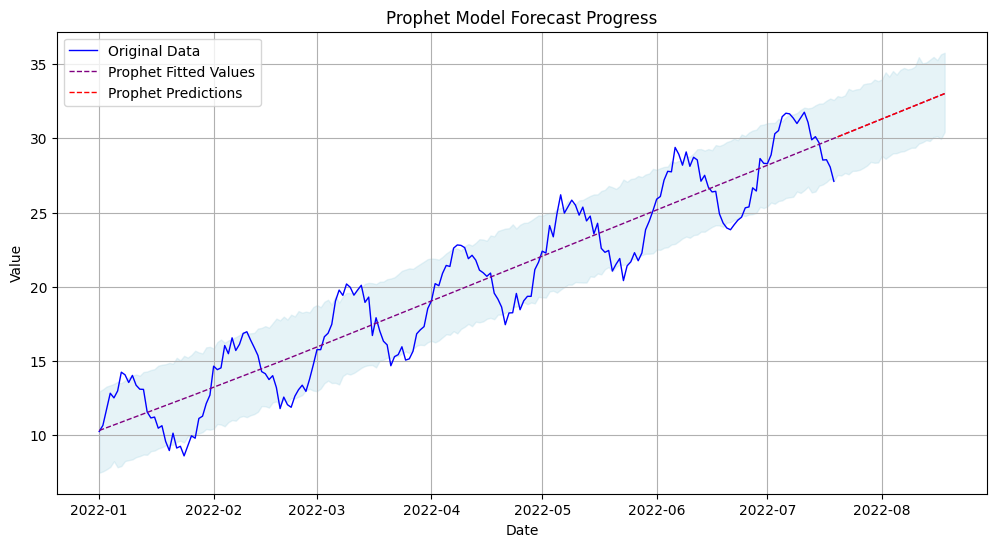

In [14]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
n = 200
time = pd.date_range(start='2022-01-01', periods=n, freq='D')
values = 10 + 0.1 * np.arange(n) + 3 * np.sin(2 * np.pi * np.arange(n) / 30) + np.random.normal(0, 0.5, n)
prophet_df = pd.DataFrame({'ds': time, 'y': values})

# Initialize and fit Prophet model
prophet_model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(prophet_df)

# Make a forecast for the next 30 time steps
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Original Data', color='blue', linewidth=1)
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Fitted Values', color='purple', linestyle='--', linewidth=1)
plt.plot(forecast['ds'][-30:], forecast['yhat'][-30:], label='Prophet Predictions', color='red', linestyle='--', linewidth=1)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.3)
plt.title('Prophet Model Forecast Progress')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()
